## 통계학 실험 9장 과제 

####  1.  (run10samp.txt) 자료를 이용한 예제

주어진 자료는 2012년 Washington, DC에서 열렸던 Cherry Blossom 10 mile run 경기에서 완주를 한 선수 100명의 자료이다. 주요 변수에 대한 설명은 다음과 같다.

|  변수명       |        설명              |
|--------|:-------------------------------------|
| time |  10 마일 달리기 완주 기록 (분)       |
| age | 선수 나이   |
| gender | 성별 (M=남성, F=여성) |
| state | 출신 지역 |


In [60]:
import lzma
import pandas as pd

(data := pd.read_csv(lzma.open('run10samp.txt.xz'), sep=' '))

,time,age,gender,state
1,88.31,59,M,MD
2,100.67,32,M,VA
3,109.52,33,F,VA
4,87.11,52,M,PA
5,73.02,40,M,DC
...,...,...,...,...
96,90.47,35,F,VA
97,94.32,28,F,VA
98,96.19,32,F,DC
99,104.31,32,F,MD


(1) 성별에 따라 완주시간에 차이가 있는지를 일원배치법을 이용하여 유의수준 5%에서 검정해보자. 가설을 세우고 검정통계량(F값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

In [61]:
from statsmodels.formula.api import ols
from statsmodels.api import stats
from IPython.display import Markdown as md

model = ols(
    'time ~ C(gender)',
    data=pd.DataFrame({'time': data.time, 'gender': data.gender})
).fit()
table = stats.anova_lm(model, typ=2)

display(table)

md(r'''
일원배치법(One-way ANOVA)으로 검정해보자.

- 모형: $Y_{ij} = \mu + \alpha_i + \epsilon_{ij}$
  - $\mu$: 모평균
  - $\alpha_i$: $i$번째 성별로 인한 처리효과 $(i = 1, 2)$
  - $\epsilon_{ij}$: 오차항
- 가정:
  - $\sum n_i\alpha_i = 0$
  - $\epsilon_{ij} \sim N(0, \sigma^2)$
- 가설:
  - $H_0 : \alpha_1 = \alpha_2 = 0$
  - $H_1 : \alpha_1 \neq 0 \; or \; \alpha_2 \neq 0$
- 검정:
  - 검정통계량 : $F = \dfrac{MS_{tr}}{MSE} = \dfrac{SS_{tr}/(k-1)}{SSE/(N-k)}$
''' + f'''\
  - $F$의 관측치 : $f = {model.fvalue}$
  - 유의확률 : $P = {model.f_pvalue}$

유의확률이 5%보다 작으므로 $H_0$는 기각, 성별은 완주 기록에 유의한 처리효과를 준다.

&nbsp;
''')

,sum_sq,df,F,PR(>F)
C(gender),5196.208189,1.0,26.186817,0.000002
Residual,19445.983095,98.0,NaN,NaN



일원배치법(One-way ANOVA)으로 검정해보자.

- 모형: $Y_{ij} = \mu + \alpha_i + \epsilon_{ij}$
  - $\mu$: 모평균
  - $\alpha_i$: $i$번째 성별로 인한 처리효과 $(i = 1, 2)$
  - $\epsilon_{ij}$: 오차항
- 가정:
  - $\sum n_i\alpha_i = 0$
  - $\epsilon_{ij} \sim N(0, \sigma^2)$
- 가설:
  - $H_0 : \alpha_1 = \alpha_2 = 0$
  - $H_1 : \alpha_1 \neq 0 \; or \; \alpha_2 \neq 0$
- 검정:
  - 검정통계량 : $F = \dfrac{MS_{tr}}{MSE} = \dfrac{SS_{tr}/(k-1)}{SSE/(N-k)}$
  - $F$의 관측치 : $f = 26.186817096914098$
  - 유의확률 : $P = 1.543881978343789e-06$

유의확률이 5%보다 작으므로 $H_0$는 기각, 성별은 완주 기록에 유의한 처리효과를 준다.

&nbsp;


(2) QQ-plot을 이용하여 성별에 따른 완주시간의 분포가 정규분포를 따르는지 확인하시오.

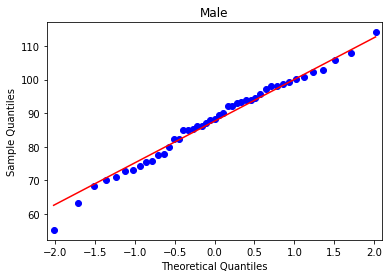

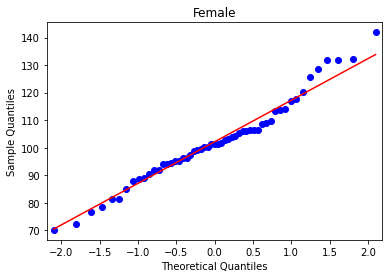


직선을 크게 벗어나지 않아, 남녀 각각의 완주기록 분포가 대체로 정규분포를 따름을 알 수 있다.

&nbsp;


In [82]:
from statsmodels.graphics.gofplots import ProbPlot
from matplotlib import pyplot as plt

ProbPlot(data[data.gender == 'M'].time).qqplot(line='s', lw=1, fmt='b')
plt.title('Male')
plt.show()
ProbPlot(data[data.gender == 'F'].time).qqplot(line='s', lw=1, fmt='b')
plt.title('Female')
plt.show()

md(r'''
직선을 크게 벗어나지 않아, 남녀 각각의 완주기록 분포가 대체로 정규분포를 따름을 알 수 있다.

&nbsp;
''')

(3) 등분산을 가정하고 성별에 따른 완주시간에 차이가 있는지를 t-test를 이용하여 유의수준 5%에서 검정해보자. 가설을 세우고 검정통계량값(t값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

In [84]:
# TODO

(4) (1)에서의 검정통계량 값과 (2)에서의 검정통계량 값은 어떠한 관계가 있고, 왜 이러한 관계가 있는지 쓰시오.

(5) run10Samp의 age를 정확한 나이가 아닌 위의 문제와 같이 연령대로 나누어 볼 것이다. run10Samp의 age열을 나이대로 바꾸시오.(58->5,42->4) \ 나이대와 성별에 따라 완주시간에 차이가 있는지를 반복이 없는 이원배치법을 이용하여 검정하고자 한다. 귀무가설과 대립가설을 쓰시오.

(6) 성별과 연령이 완주시간에 영향을 미치는지 유의수준 5%에서 검정해보자. 검정통계량(F값), P_value를 쓰고 귀무가설 기각여부를 쓰시오.

(7) 성별과 연령에 대한 상호작용 유무를 interaction plot을 통해 확인해보시오